# 0. Table of Content:  

[1. Import:](#1.-Import:)  
[2. Instructions & choice of audience: ](#2.-Instructions-&-choice-of-audience: )   
[3. Load data:](#3.-Load-data:)  
- [3.1. Sheets names:](###3.1.-Sheets-names:)
- [3.2. Population of England and Great-Britain 1086-1870:](#3.2.-Population-of-England-and-Great-Britain-1086-1870:)
- [3.3. English GDP 1086-1870 & Great Britain GDP 1700-1870:](#3.3.-English-GDP-1086-1870-&-Great-Britain-GDP-1700-1870:)
- [3.4. Real earnings 1209-2016:](#3.4.-Real-earnings-1209-2016:)
    
[4. Data wrangling:](#4.-Data-wrangling:)  
- [4.1. Population of England and Great-Britain 1086-1870:](#4.1.-Population-of-England-and-Great-Britain-1086-1870:)
- [4.2. English GDP 1086-1870 & Great Britain GDP 1700-1870:](#4.2.-English-GDP-1086-1870-&-Great-Britain-GDP-1700-1870:)
- [4.3. Real earnings 1209-2016:](#4.3.-Real-earnings-1209-2016:)
- [4.4. Datasets concatenation:](#4.4.-Datasets-concatenation:)
- [4.5. Bonus, real GDP per capita index:](#4.5.-Bonus,-real-GDP-per-capita-index:)  

[5. Data visualization:](#5.-Data-visualization:)  
- [5.1. Data overview line plots:](#5.1.-Data-overview-line-plots:)
- [5.2. Correlations seach:](#5.2.-Correlations-seach:)
- [5.3. Dual axis line plots:](#5.3.-Dual-axis-line-plots:)
- [5.4. Selected years comparison, bar chart:](#5.4.-Selected-years-comparison,-bar-chart:)
- [5.5. Observations and take-aways for the Powerpoint presentation:](#5.5.-Observations-and-take-aways-for-the-Powerpoint-presentation:)  

# 1. Import:  

In [4]:
#!pip install --upgrade openpyxl

from IPython.display import IFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Instructions & choice of audience:  

In [6]:
instructions_path = r"..\docs\docs\1687277618_Craft_a_Story_from_a_Dataset.pdf"
IFrame(instructions_path, width=800, height=600)

## The chosen audience is the non-technical stakeholders.

# 3. Load data:

## 3.1. Sheets names:

In [10]:
uk_economics_path = r"..\data\raw\millenniumofdata_v3_final.xlsx"
all_sheets = pd.read_excel(uk_economics_path, sheet_name=None)

In [11]:
uk_economics_sheets = list(all_sheets.keys())
print(uk_economics_sheets)

['Disclaimer', "What's new in V3", 'Front page', 'A1. Headline series', 'TableofContent', 'A2. Pop of Eng & GB 1086-1870', 'A3. Eng. Agriculture 1270-1870', 'A4. Ind Production 1270-1870', 'A5. Service Sector 1270-1870', 'A6. English GDP(O) 1270-1700', 'A7. GB GDP(O) 1700-1870', 'Notes on GDP estimates', 'A8. UK Real GDP(A)', 'A9. Nominal GDP (A)', 'A10. GNP and National Saving', 'A11. GDP(E) components - values', 'A12. GDP(E) components - vols', 'A13. GDP(E) contributions', 'A14. Real GDP(O) components', 'A15. Factor incomes by SIC ', 'A16. Industry GVA shares by SIC', 'A17. GDP(I) components', 'A18. Population 1680+', 'A19. Migration flows', 'A20. Migration by citizenship', 'A21. GDP per capita 1086+', 'A22. Coin in circulation', "A23. Bank of England B'Sheet", 'A24. Monetary aggregates', 'A25. Credit aggregates', 'A25a. Bills of Exchange', 'A26. Central govt 1290-1689', 'A27. Central govt borrowing ', 'A28. Public Sector Borrowing', 'A28a. Public Sector Spending', 'A29. The National

## 3.2. Population of England and Great-Britain 1086-1870:  

In [13]:
df_population = pd.read_excel(uk_economics_path, sheet_name="A2. Pop of Eng & GB 1086-1870", skiprows=6)
df_population.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Year,"Population of England, millions","Population of Great Britain, millions"
1,1086,1.71,NaN
2,1087,1.71981,NaN
3,1088,1.729676,NaN
4,1089,1.739598,NaN
5,1090,1.749578,NaN
6,1091,1.759615,NaN
7,1092,1.769709,NaN
8,1093,1.779861,NaN
9,1094,1.790072,NaN


## 3.3. English GDP 1086-1870 & Great Britain GDP 1700-1870:

In [15]:
df_gdp_england = pd.read_excel(uk_economics_path, sheet_name="A6. English GDP(O) 1270-1700", skiprows=5)
df_gdp_england.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Year,Real GDP (1700 =100),NaN,NaN,NaN,NaN,Nominal GDP (mn £),NaN,Price Index (1700=100),NaN,NaN,NaN
1,NaN,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator
2,1086 (Walker (2008)),NaN,NaN,NaN,NaN,NaN,0.386-0.4745,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1270,64.596764,28.151841,37.005158,40.581988,NaN,4.440546,NaN,17.789079,15.346818,16.687132,16.597583
5,1271,63.922771,27.382561,37.409915,40.160298,NaN,4.7903,NaN,20.684271,14.957209,17.621449,18.092876
6,1272,69.028877,27.722861,37.512954,41.66774,NaN,4.963715,NaN,23.480587,13.361422,14.348568,18.069606
7,1273,61.402833,26.856267,37.553549,39.302597,NaN,4.421184,NaN,19.67284,14.882535,15.667059,17.063149
8,1274,60.487579,26.98748,37.650892,39.156498,NaN,4.691772,NaN,21.950834,13.731647,16.910094,18.175017
9,1275,76.868219,29.764789,37.869482,44.757634,NaN,5.473078,NaN,22.7445,13.996756,16.710256,18.548394


In [16]:
df_gdp_gb = pd.read_excel(uk_economics_path, sheet_name="A7. GB GDP(O) 1700-1870", skiprows=5)
df_gdp_gb.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Year,Real GDP (1700 =100),NaN,NaN,NaN,NaN,Nominal GDP (mln £),NaN,Price Index (1700=100),NaN,NaN,NaN,NaN,NaN
1,NaN,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator,NaN,NaN
2,1700,100,100,100,100,NaN,76.01252,NaN,100,100,100,100,NaN,NaN
3,1701,111.063495,111.862558,103.494472,108.972058,NaN,79.129635,NaN,88.546499,98.090638,98.05002,95.529803,NaN,NaN
4,1702,117.736323,101.112362,103.0234,106.16158,NaN,75.827471,NaN,86.996865,95.436059,97.885148,93.96672,NaN,NaN
5,1703,104.666207,92.644368,103.598023,99.358023,NaN,69.465726,NaN,80.142811,95.58553,97.19417,91.977693,NaN,NaN
6,1704,131.247698,117.019911,109.105115,118.285901,NaN,85.536548,NaN,87.75951,97.20737,98.608615,95.133529,NaN,NaN
7,1705,127.027485,105.897258,108.178385,112.267842,NaN,79.364964,NaN,80.040561,97.025815,98.618696,93.001151,NaN,NaN
8,1706,98.720929,85.358489,104.574505,95.073385,NaN,64.295757,NaN,77.827534,90.597704,96.162198,88.968902,NaN,NaN
9,1707,115.154765,98.301505,110.847239,106.814275,NaN,71.677866,NaN,78.420232,88.169381,96.655279,88.281691,NaN,NaN


## 3.4. Real earnings 1209-2016:  

In [18]:
df_real_earnings = pd.read_excel(uk_economics_path, sheet_name="A48. Real Earnings ")
df_real_earnings.head(15)

,Back to front page,A48. Real consumption and product wages 1209-2016,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,Real Consumption Wages,NaN,NaN,Real product wages,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,GB,NaN,NaN,GB,NaN,NaN,NaN,NaN,NaN,...,Great Britain,Great Britain,UK/GB,UK/GB,Ireland,Ireland,Ireland,Ireland,UK,UK
2,Source,Using preferred earnings and CPI series. Note...,Growth,10 year average,Nominal wage divided by GDP deflator at factor...,Nominal wage divided by GDP deflator at market...,Ratio of employers' social (national inusrance...,NaN,NaN,Spliced measure of real product wage,...,Feinstein (1998),"Feinstein (1998) wages, Allen (2007) prices",Feinstein (1998) UK wages and GB prices,"Feinstein (1998) UK wages, Allen (2007) GB prices","Real wages, Geary and Stark (2014)",Irish real wages relative to GB wages,"Real wages, following Geary and Stark rebased ...",Irish population share to proxy employment shares,"Real wage index based on Feinstein GB wages, A...",Feinstein (1990) UK wages and prices
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1835=100,1835=100,1835=100,1835=100,1835=100,1785=100,NaN,NaN,1835=100,NaN
4,1209,51.788622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1210,44.649941,-13.784265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1211,34.862651,-21.920051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1212,49.352265,41.561995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1213,57.284669,16.07303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1214,66.492051,16.07303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Data wrangling:

## 4.1. Population of England and Great-Britain 1086-1870:  

To support fair comparison and to align with the GDP data that include the overall Great-Britain data into account starting from the year 1700, we will replace the England population by the overall Great-Britain population starting from the year 1700.  

In [22]:
df_population.columns = df_population.iloc[0]
df_population = df_population[1:].reset_index(drop=True)
df_population.head()

,Year,"Population of England, millions","Population of Great Britain, millions"
0,1086,1.71,NaN
1,1087,1.71981,NaN
2,1088,1.729676,NaN
3,1089,1.739598,NaN
4,1090,1.749578,NaN


In [23]:
df_population.columns

Index(['Year', 'Population of England, millions',
       'Population of Great Britain, millions'],
      dtype='object', name=0)

In [24]:
df_population_1699 = df_population.loc[df_population["Year"]<=1699, ["Year", "Population of England, millions"]]
df_population_1700 = df_population.loc[df_population["Year"]>=1700, ["Year", "Population of Great Britain, millions"]]

# prepraration for concatenation:
df_population_1699 = df_population_1699.rename(columns={"Population of England, millions":"Population, millions"})
df_population_1700 = df_population_1700.rename(columns={"Population of Great Britain, millions":"Population, millions"})



In [25]:
df_population_1699.tail()

,Year,"Population, millions"
609,1695,5.109708
610,1696,5.118433
611,1697,5.150015
612,1698,5.177316
613,1699,5.190149


In [26]:
df_population_1700.head()

,Year,"Population, millions"
614,1700,6.205051
615,1701,6.243316
616,1702,6.287647
617,1703,6.341897
618,1704,6.372712


In [27]:
print(df_population_1699.shape, df_population_1700.shape)

(614, 2) (171, 2)


In [28]:
df_population_final = pd.concat([df_population_1699, df_population_1700], axis=0, ignore_index=True)
df_population_final = df_population_final[df_population_final["Year"]>=1270]
df_population_final.reset_index(drop=True, inplace=True)
df_population_final

,Year,"Population, millions"
0,1270,4.364903
1,1271,4.371751
2,1272,4.378609
3,1273,4.385478
4,1274,4.392357
...,...,...
596,1866,24.625
597,1867,24.922
598,1868,25.224
599,1869,25.529


In [29]:
df_population_final.shape

(601, 2)

In [30]:
df_population_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  601 non-null    object
 1   Population, millions  601 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


## 4.2. English GDP 1086-1870 & Great Britain GDP 1700-1870: 

**An important point to keep in mind as we will see in the "real earnings" data, is that the GDP is based on the year `1700 = 100`.**

In [33]:
df_gdp_england.columns = df_gdp_england.iloc[1]
df_gdp_england = df_gdp_england.iloc[4:].reset_index(drop=True)
df_gdp_england.head()

1,NaN,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator
0,1270,64.596764,28.151841,37.005158,40.581988,NaN,4.440546,NaN,17.789079,15.346818,16.687132,16.597583
1,1271,63.922771,27.382561,37.409915,40.160298,NaN,4.7903,NaN,20.684271,14.957209,17.621449,18.092876
2,1272,69.028877,27.722861,37.512954,41.66774,NaN,4.963715,NaN,23.480587,13.361422,14.348568,18.069606
3,1273,61.402833,26.856267,37.553549,39.302597,NaN,4.421184,NaN,19.67284,14.882535,15.667059,17.063149
4,1274,60.487579,26.98748,37.650892,39.156498,NaN,4.691772,NaN,21.950834,13.731647,16.910094,18.175017


In [34]:
england_cols_initial = list(df_gdp_england.columns)
england_cols_initial = [f"unnamed_{i}" if pd.isna(x) else x for i, x in enumerate(england_cols_initial)]
england_cols_initial = [f"{x}_{i}" if x in ['Agriculture', 'Industry','Services',] else x for i, x in enumerate(england_cols_initial)]
england_cols_initial

['unnamed_0',
 'Agriculture_1',
 'Industry_2',
 'Services_3',
 'GDP',
 'unnamed_5',
 'unnamed_6',
 'unnamed_7',
 'Agriculture_8',
 'Industry_9',
 'Services_10',
 'GDP Deflator']

In [35]:
england_cols_final = [
    "year",
    "real_gdp_agriculture",
    "real_gdp_industry",
    "real_gdp_services",
    "real_GDP_base_1700",
    "drop1",
    "nominal_GDP, millions",
    "drop2",
    "price_index_agriculture",
    "price_index_industry",
    "price_index_services",
    "price_index_GDP_deflator"]

In [36]:
df_gdp_england.columns = england_cols_initial

In [37]:
england_cols = dict(zip(england_cols_initial, england_cols_final))
df_gdp_england = df_gdp_england.rename(columns=england_cols)
df_gdp_england = df_gdp_england.drop(['drop1', 'drop2'], axis=1)
df_gdp_england.head()

,year,real_gdp_agriculture,real_gdp_industry,real_gdp_services,real_GDP_base_1700,"nominal_GDP, millions",price_index_agriculture,price_index_industry,price_index_services,price_index_GDP_deflator
0,1270,64.596764,28.151841,37.005158,40.581988,4.440546,17.789079,15.346818,16.687132,16.597583
1,1271,63.922771,27.382561,37.409915,40.160298,4.7903,20.684271,14.957209,17.621449,18.092876
2,1272,69.028877,27.722861,37.512954,41.66774,4.963715,23.480587,13.361422,14.348568,18.069606
3,1273,61.402833,26.856267,37.553549,39.302597,4.421184,19.67284,14.882535,15.667059,17.063149
4,1274,60.487579,26.98748,37.650892,39.156498,4.691772,21.950834,13.731647,16.910094,18.175017


In [38]:
df_gdp_england_final = df_gdp_england[["year", "real_GDP_base_1700"]]
df_gdp_england_final = df_gdp_england_final[df_gdp_england_final["year"]!=1700]
df_gdp_england_final

,year,real_GDP_base_1700
0,1270,40.581988
1,1271,40.160298
2,1272,41.66774
3,1273,39.302597
4,1274,39.156498
...,...,...
425,1695,99.760218
426,1696,95.534486
427,1697,94.853405
428,1698,97.61639


In [39]:
df_gdp_gb.columns = df_gdp_gb.iloc[1]
df_gdp_gb = df_gdp_gb.iloc[2:].reset_index(drop=True)
df_gdp_gb.head()

1,NaN,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator,NaN,NaN
0,1700,100,100,100,100,NaN,76.01252,NaN,100,100,100,100,NaN,NaN
1,1701,111.063495,111.862558,103.494472,108.972058,NaN,79.129635,NaN,88.546499,98.090638,98.05002,95.529803,NaN,NaN
2,1702,117.736323,101.112362,103.0234,106.16158,NaN,75.827471,NaN,86.996865,95.436059,97.885148,93.96672,NaN,NaN
3,1703,104.666207,92.644368,103.598023,99.358023,NaN,69.465726,NaN,80.142811,95.58553,97.19417,91.977693,NaN,NaN
4,1704,131.247698,117.019911,109.105115,118.285901,NaN,85.536548,NaN,87.75951,97.20737,98.608615,95.133529,NaN,NaN


In [40]:
gb_cols_initial = list(df_gdp_gb.columns)
gb_cols_initial = [f"unnamed_{i}" if pd.isna(x) else x for i, x in enumerate(gb_cols_initial)]
gb_cols_initial = [f"{x}_{i}" if x in ['Agriculture', 'Industry','Services',] else x for i, x in enumerate(gb_cols_initial)]
gb_cols_initial

['unnamed_0',
 'Agriculture_1',
 'Industry_2',
 'Services_3',
 'GDP',
 'unnamed_5',
 'unnamed_6',
 'unnamed_7',
 'Agriculture_8',
 'Industry_9',
 'Services_10',
 'GDP Deflator',
 'unnamed_12',
 'unnamed_13']

In [41]:
gb_cols_final = [
    "year",
    "real_gdp_agriculture",
    "real_gdp_industry",
    "real_gdp_services",
    "real_GDP_base_1700",
    "drop1",
    "nominal_GDP, millions",
    "drop2",
    "price_index_agriculture",
    "price_index_industry",
    "price_index_services",
    "price_index_GDP_deflator",
    "drop3",
    "drop4"]

In [42]:
df_gdp_gb.columns = gb_cols_initial
gb_cols = dict(zip(gb_cols_initial, gb_cols_final))

In [43]:
df_gdp_gb = df_gdp_gb.rename(columns=gb_cols)
df_gdp_gb = df_gdp_gb.drop(["drop1", "drop2", "drop3", "drop4"], axis=1)
df_gdp_gb_final = df_gdp_gb[["year", "real_GDP_base_1700"]]
df_gdp_gb_final

,year,real_GDP_base_1700
0,1700,100
1,1701,108.972058
2,1702,106.16158
3,1703,99.358023
4,1704,118.285901
...,...,...
166,1866,896.992051
167,1867,903.385868
168,1868,950.046384
169,1869,961.201998


In [44]:
df_gdp_final = pd.concat([df_gdp_england_final, df_gdp_gb_final], axis=0)
df_gdp_final.reset_index(drop=True, inplace=True)
df_gdp_final

,year,real_GDP_base_1700
0,1270,40.581988
1,1271,40.160298
2,1272,41.66774
3,1273,39.302597
4,1274,39.156498
...,...,...
596,1866,896.992051
597,1867,903.385868
598,1868,950.046384
599,1869,961.201998


In [45]:
df_gdp_final.shape

(601, 2)

In [46]:
df_gdp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                601 non-null    object
 1   real_GDP_base_1700  601 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


## 4.3. Real earnings 1209-2016:

**As noted in the `GDP` data, the reference and base is fixed at the year `1700`.**  
**However, in the `real earnings data`, the reference and base is the year `1900`.**  
Therefore, we will need to **rebase the real earnings index from 1900 = 100 to 1700 = 100** in order to ensure meaningful and fair comparisons with the GDP data. This will align both time series to a common baseline, allowing us to observe whether real earnings and economic output evolved at similar rates over the long run.  

In [49]:
df_real_earnings = df_real_earnings.iloc[:, [0,1]]

In [50]:
df_real_earnings

,Back to front page,A48. Real consumption and product wages 1209-2016
0,NaN,Real Consumption Wages
1,Country,GB
2,Source,Using preferred earnings and CPI series. Note...
3,NaN,NaN
4,1209,51.788622
...,...,...
807,2012,609.340198
808,2013,601.077184
809,2014,599.71242
810,2015,614.047597


In [51]:
df_real_earnings = df_real_earnings[4:].reset_index(drop=True)
df_real_earnings.columns = ["year", "real_consumption_wage_index_1900_base"]
df_real_earnings = df_real_earnings[(df_real_earnings["year"]>=1270) & (df_real_earnings["year"]<=1870)]
df_real_earnings

,year,real_consumption_wage_index_1900_base
61,1270,28.868052
62,1271,23.036657
63,1272,18.59956
64,1273,25.647871
65,1274,23.418401
...,...,...
657,1866,62.973462
658,1867,60.363135
659,1868,61.765443
660,1869,65.489867


In [52]:
df_real_earnings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 61 to 661
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   year                                   601 non-null    object
 1   real_consumption_wage_index_1900_base  601 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


To align with the GDP dataset, we need to ensure that the base = 1700 and not anymore base = 1900.   
The "Year" data needs to be converted to numerical data.  

In [54]:
df_real_earnings["year"] = pd.to_numeric(df_real_earnings["year"], errors="coerce")
df_real_earnings["year"].info()

<class 'pandas.core.series.Series'>
Index: 601 entries, 61 to 661
Series name: year
Non-Null Count  Dtype
--------------  -----
601 non-null    int64
dtypes: int64(1)
memory usage: 9.4 KB


In [55]:
value_base_1700 = df_real_earnings.loc[df_real_earnings["year"] == 1700, "real_consumption_wage_index_1900_base"].values[0]
value_base_1700

35.44129217527508

In [56]:
df_real_earnings["real_consumption_wage_index_1700_base"] = (df_real_earnings["real_consumption_wage_index_1900_base"] / value_base_1700) * 100
df_real_earnings

,year,real_consumption_wage_index_1900_base,real_consumption_wage_index_1700_base
61,1270,28.868052,81.453159
62,1271,23.036657,64.999484
63,1272,18.59956,52.479915
64,1273,25.647871,72.367201
65,1274,23.418401,66.076601
...,...,...,...
657,1866,62.973462,177.683877
658,1867,60.363135,170.318662
659,1868,61.765443,174.27537
660,1869,65.489867,184.784083


In [57]:
df_real_earnings.drop("real_consumption_wage_index_1900_base", axis=1, inplace=True)
df_real_earnings.reset_index(drop=True, inplace=True)
df_real_earnings

,year,real_consumption_wage_index_1700_base
0,1270,81.453159
1,1271,64.999484
2,1272,52.479915
3,1273,72.367201
4,1274,66.076601
...,...,...
596,1866,177.683877
597,1867,170.318662
598,1868,174.27537
599,1869,184.784083


## 4.4. Datasets concatenation:

In [59]:
df_population_final

,Year,"Population, millions"
0,1270,4.364903
1,1271,4.371751
2,1272,4.378609
3,1273,4.385478
4,1274,4.392357
...,...,...
596,1866,24.625
597,1867,24.922
598,1868,25.224
599,1869,25.529


In [60]:
df_gdp_final

,year,real_GDP_base_1700
0,1270,40.581988
1,1271,40.160298
2,1272,41.66774
3,1273,39.302597
4,1274,39.156498
...,...,...
596,1866,896.992051
597,1867,903.385868
598,1868,950.046384
599,1869,961.201998


In [61]:
df_uk_economics = pd.concat(
    [df_population_final, 
     df_gdp_final["real_GDP_base_1700"], 
     df_real_earnings["real_consumption_wage_index_1700_base"]], 
    axis=1)

df_uk_economics

,Year,"Population, millions",real_GDP_base_1700,real_consumption_wage_index_1700_base
0,1270,4.364903,40.581988,81.453159
1,1271,4.371751,40.160298,64.999484
2,1272,4.378609,41.66774,52.479915
3,1273,4.385478,39.302597,72.367201
4,1274,4.392357,39.156498,66.076601
...,...,...,...,...
596,1866,24.625,896.992051,177.683877
597,1867,24.922,903.385868,170.318662
598,1868,25.224,950.046384,174.27537
599,1869,25.529,961.201998,184.784083


## 4.5. Bonus, real GDP per capita index:

In [63]:
df_uk_economics["gdp_per_capita_index_1700_base"] = df_uk_economics["real_GDP_base_1700"] / (df_uk_economics["Population, millions"] * 1000000)

To align with other data, rebase per capita to base = 1700:

In [65]:
df_uk_economics

,Year,"Population, millions",real_GDP_base_1700,real_consumption_wage_index_1700_base,gdp_per_capita_index_1700_base
0,1270,4.364903,40.581988,81.453159,0.000009
1,1271,4.371751,40.160298,64.999484,0.000009
2,1272,4.378609,41.66774,52.479915,0.00001
3,1273,4.385478,39.302597,72.367201,0.000009
4,1274,4.392357,39.156498,66.076601,0.000009
...,...,...,...,...,...
596,1866,24.625,896.992051,177.683877,0.000036
597,1867,24.922,903.385868,170.318662,0.000036
598,1868,25.224,950.046384,174.27537,0.000038
599,1869,25.529,961.201998,184.784083,0.000038


In [66]:
capita_base_value = df_uk_economics.loc[df_uk_economics["Year"] == 1700, "gdp_per_capita_index_1700_base"].values[0]
capita_base_value

1.6115902231336825e-05

In [67]:
df_uk_economics["gdp_per_capita_index_1700_base"] = (df_uk_economics["gdp_per_capita_index_1700_base"] / capita_base_value) * 100
df_uk_economics

,Year,"Population, millions",real_GDP_base_1700,real_consumption_wage_index_1700_base,gdp_per_capita_index_1700_base
0,1270,4.364903,40.581988,81.453159,57.69047
1,1271,4.371751,40.160298,64.999484,57.001584
2,1272,4.378609,41.66774,52.479915,59.048544
3,1273,4.385478,39.302597,72.367201,55.609595
4,1274,4.392357,39.156498,66.076601,55.316103
...,...,...,...,...,...
596,1866,24.625,896.992051,177.683877,226.025652
597,1867,24.922,903.385868,170.318662,224.923989
598,1868,25.224,950.046384,174.27537,233.709425
599,1869,25.529,961.201998,184.784083,233.628724


# 5. Data visualization:

## 5.1. Data overview line plots:

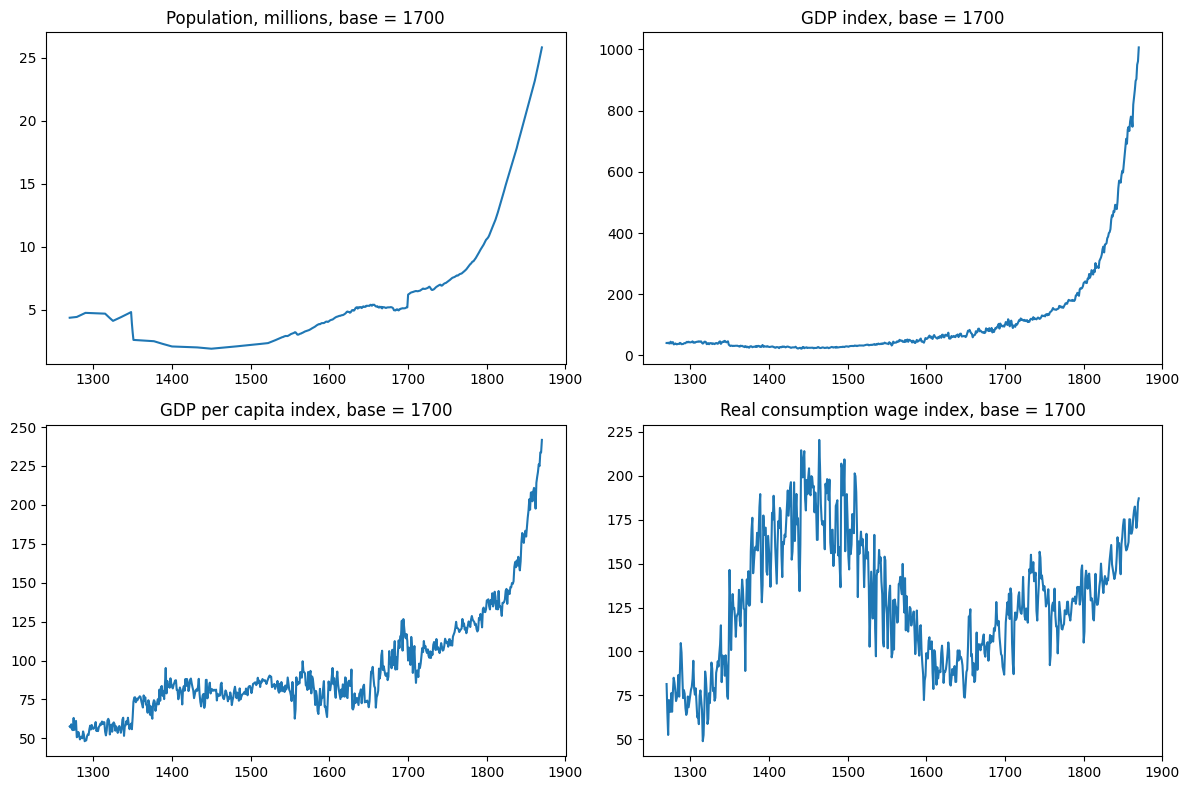

In [70]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

cols_titles = [
    ("Population, millions", "Population, millions"),
    ("real_GDP_base_1700", "GDP index"),
    ("gdp_per_capita_index_1700_base", "GDP per capita index"),
    ("real_consumption_wage_index_1700_base", "Real consumption wage index")
]

axes = axes.flatten()

for ax, (col, title) in zip(axes, cols_titles):
    ax.plot(df_uk_economics["Year"], df_uk_economics[col])
    ax.set_title(f"{title}, base = 1700")

plt.tight_layout()

fig.savefig(r"..\docs\docs\UK_economics_matrix.png", dpi=300, bbox_inches="tight")

plt.show()

## 5.2. Correlations seach:

In [72]:
uk_economics_cols = [
    "Population, millions",
    "real_GDP_base_1700",
    "gdp_per_capita_index_1700_base",
    "real_consumption_wage_index_1700_base"
]

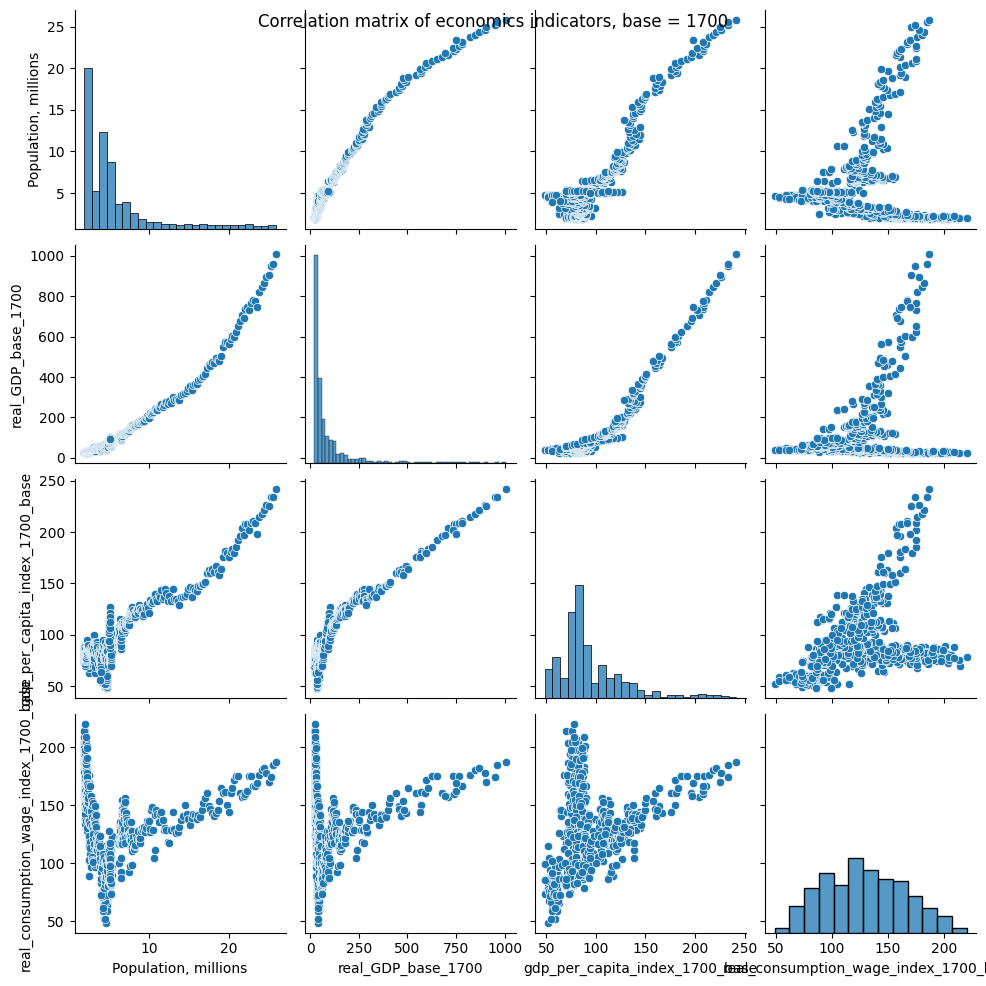

In [73]:
pplot = sns.pairplot(df_uk_economics[uk_economics_cols])   
pplot.fig.suptitle("Correlation matrix of economics indicators, base = 1700")

pplot.fig.savefig(r"..\docs\docs\Correlation_matrix_economics_indicators_base1700.png", dpi=300, bbox_inches="tight")

plt.show()

## 5.3. Dual axis line plots:

In [75]:
def plot_dual_axis(x, y1, y2, y1_label, y2_label, title):
    """
    Plots two time series on a dual-axis line chart and saves the figure as a PNG.
    The function reads data from a global DataFrame `df_uk_economics`.
    The plot is saved in '../docs/docs/' with the title (lowercased and underscored) as filename.
    The plot uses a dual y-axis (left and right) for comparing indicators with different scales.
    """

    fig, ax = plt.subplots(figsize=(18, 12))

    ax.plot(df_uk_economics[x], df_uk_economics[y1], color="blue", label=y1_label)
    ax.set_xlabel(x)
    ax.set_ylabel(y1_label, color="blue")
    ax.tick_params(axis="y", labelcolor="blue")

    ax2 = ax.twinx()

    ax2.plot(df_uk_economics[x], df_uk_economics[y2], color="red", label=y2_label)
    ax2.set_ylabel(y2_label, color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    #legend:
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=18)

    plt.title(title)

    fig.savefig(f"..\docs\docs\{title.replace(' ', '_').lower()}.png", dpi=300, bbox_inches="tight")
    
    plt.tight_layout()
    plt.show()

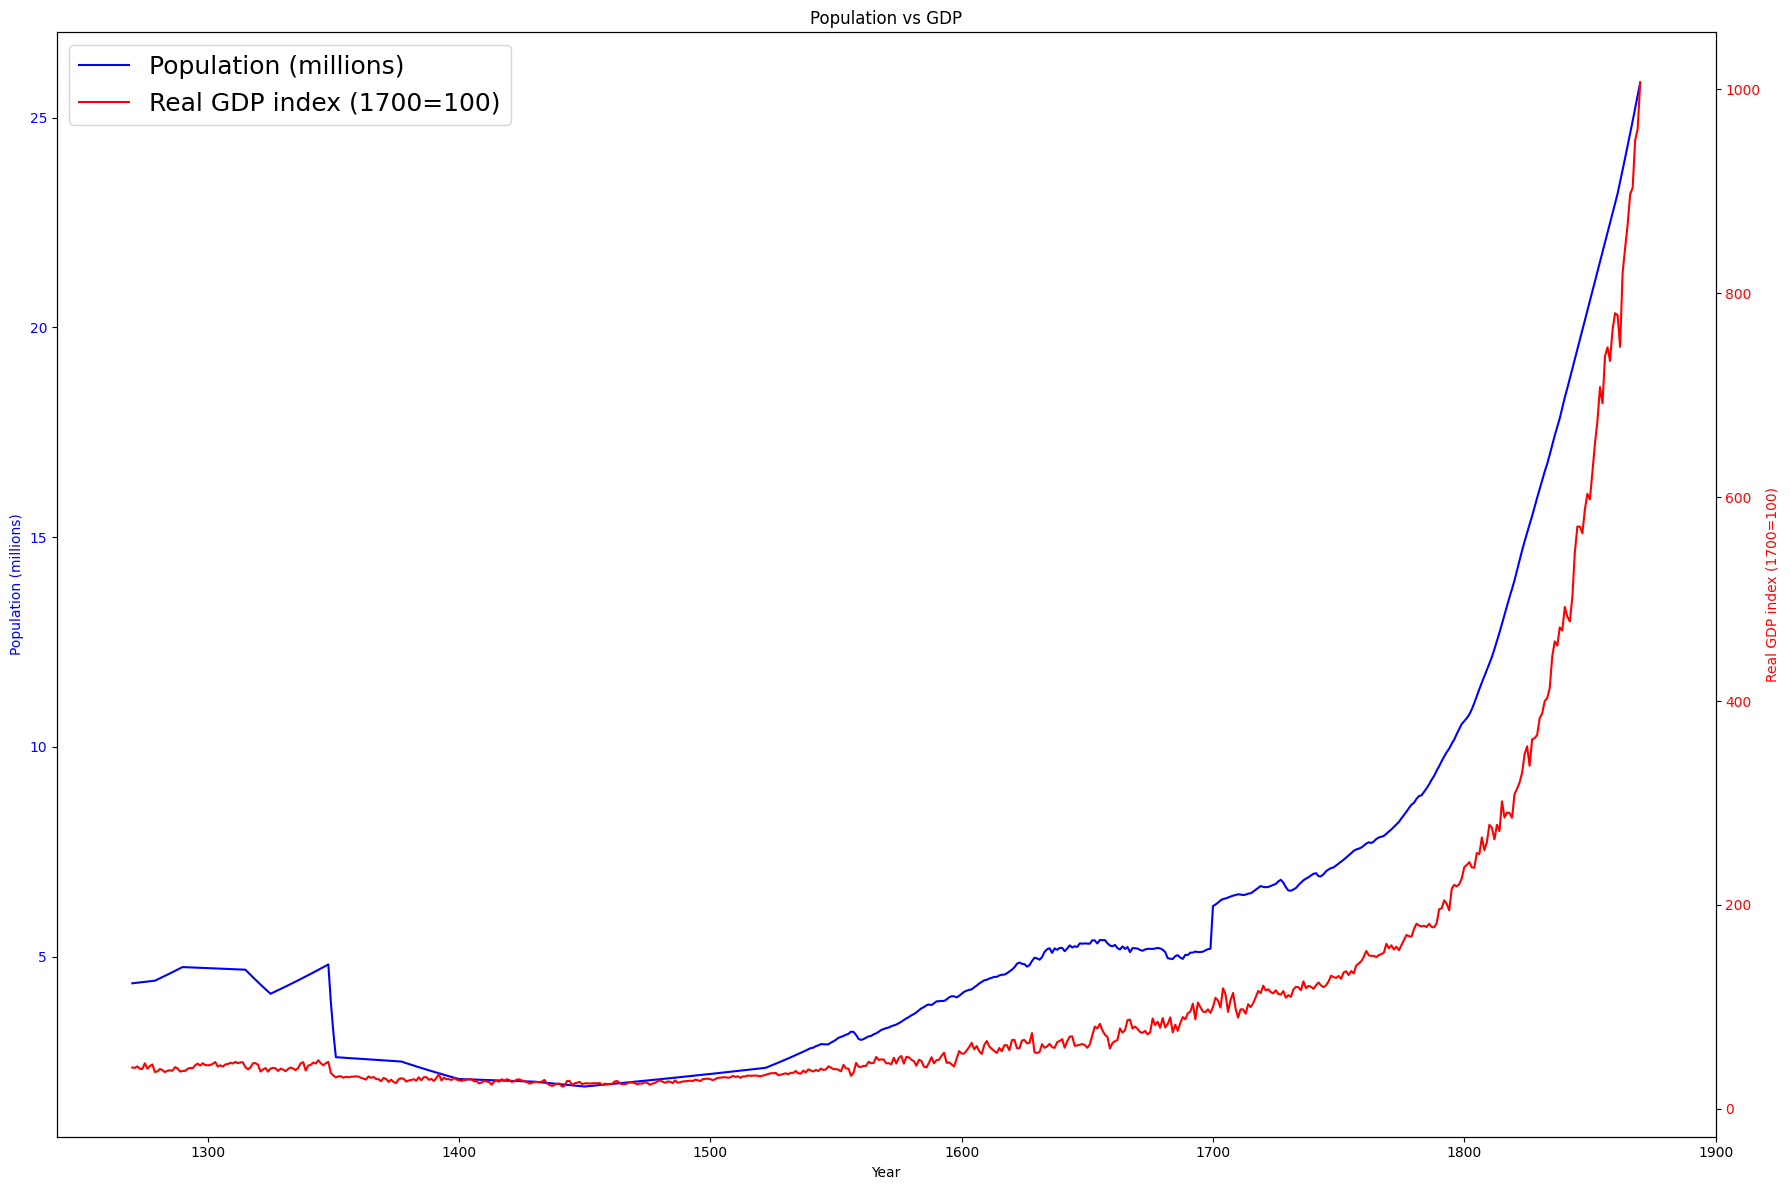

In [76]:
plot_dual_axis("Year", 
               "Population, millions", 
               "real_GDP_base_1700", 
               "Population (millions)", 
               "Real GDP index (1700=100)",
              "Population vs GDP")

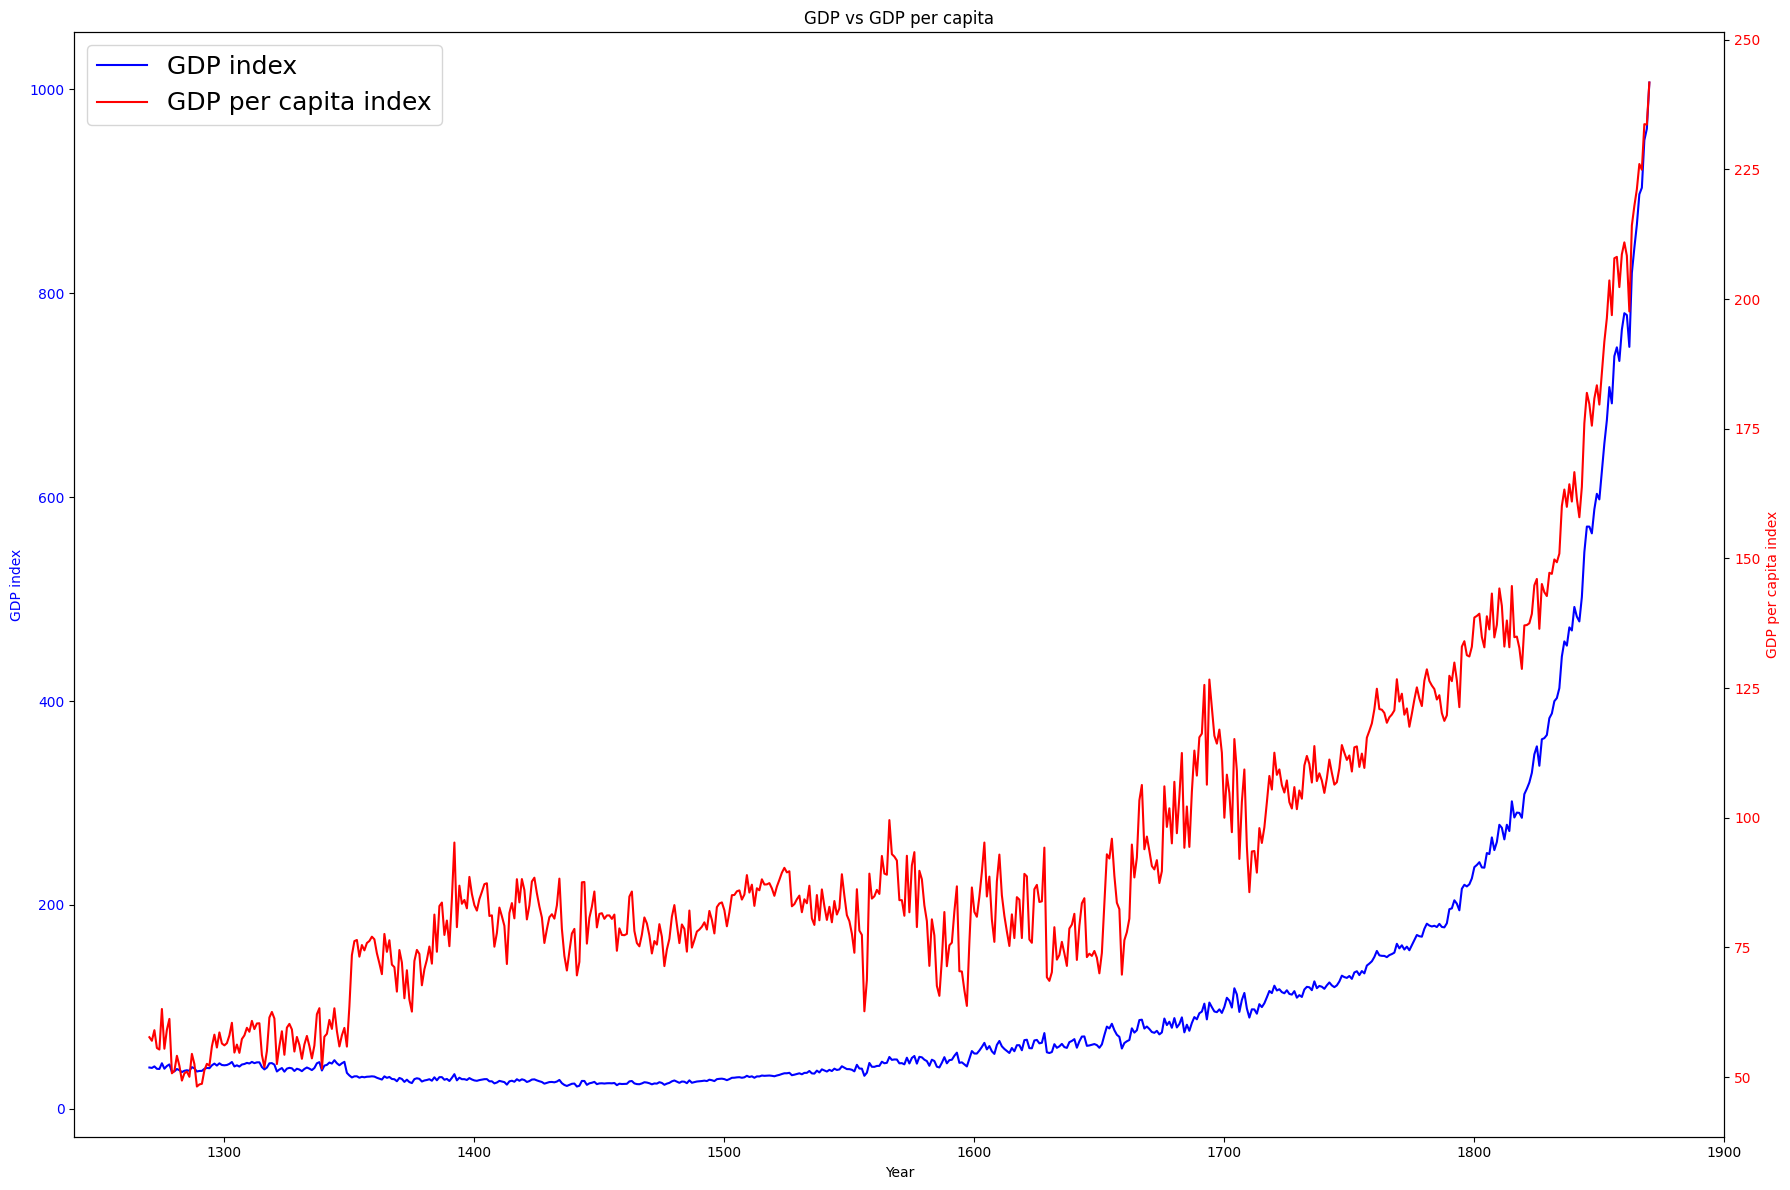

In [77]:
plot_dual_axis("Year", 
               "real_GDP_base_1700", 
               "gdp_per_capita_index_1700_base", 
               "GDP index", 
               "GDP per capita index",
              "GDP vs GDP per capita")

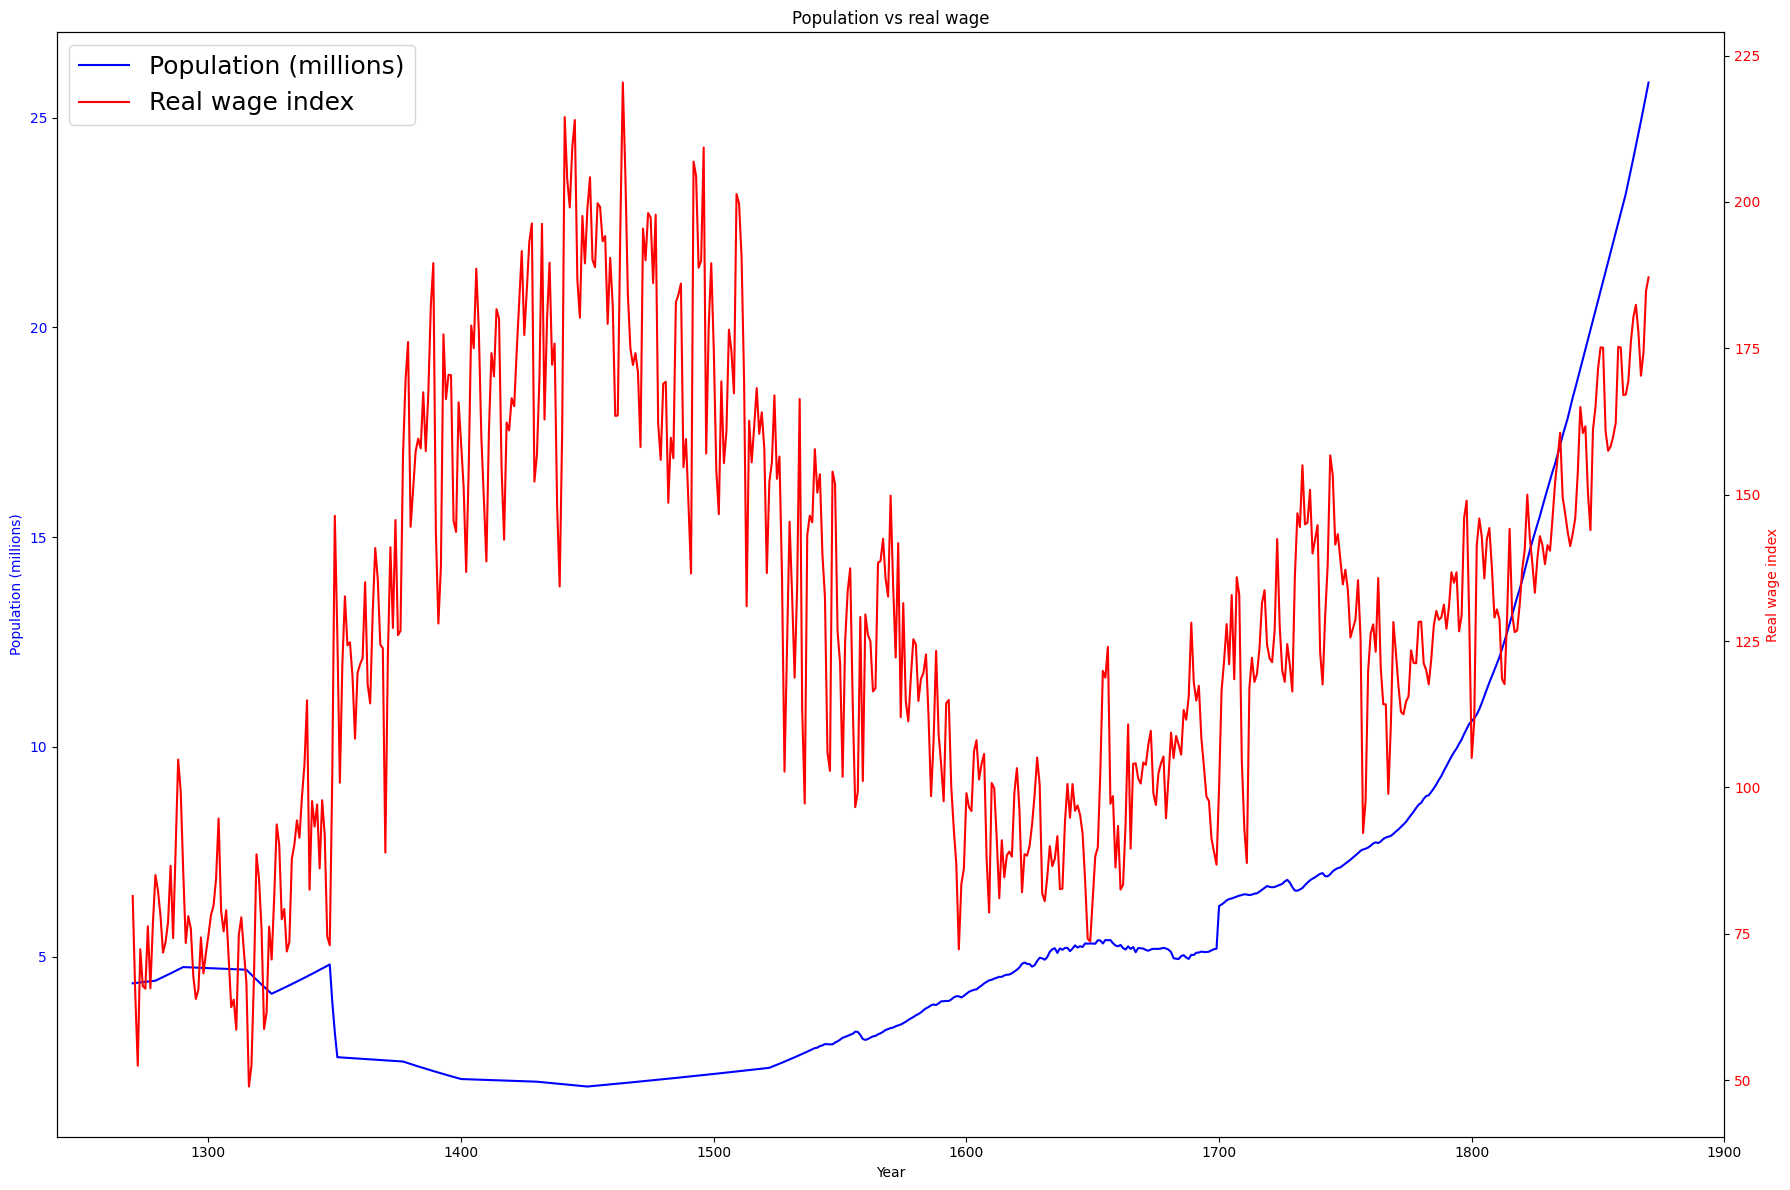

In [78]:
plot_dual_axis("Year", 
               "Population, millions", 
               "real_consumption_wage_index_1700_base", 
               "Population (millions)", 
               "Real wage index",
              "Population vs real wage")

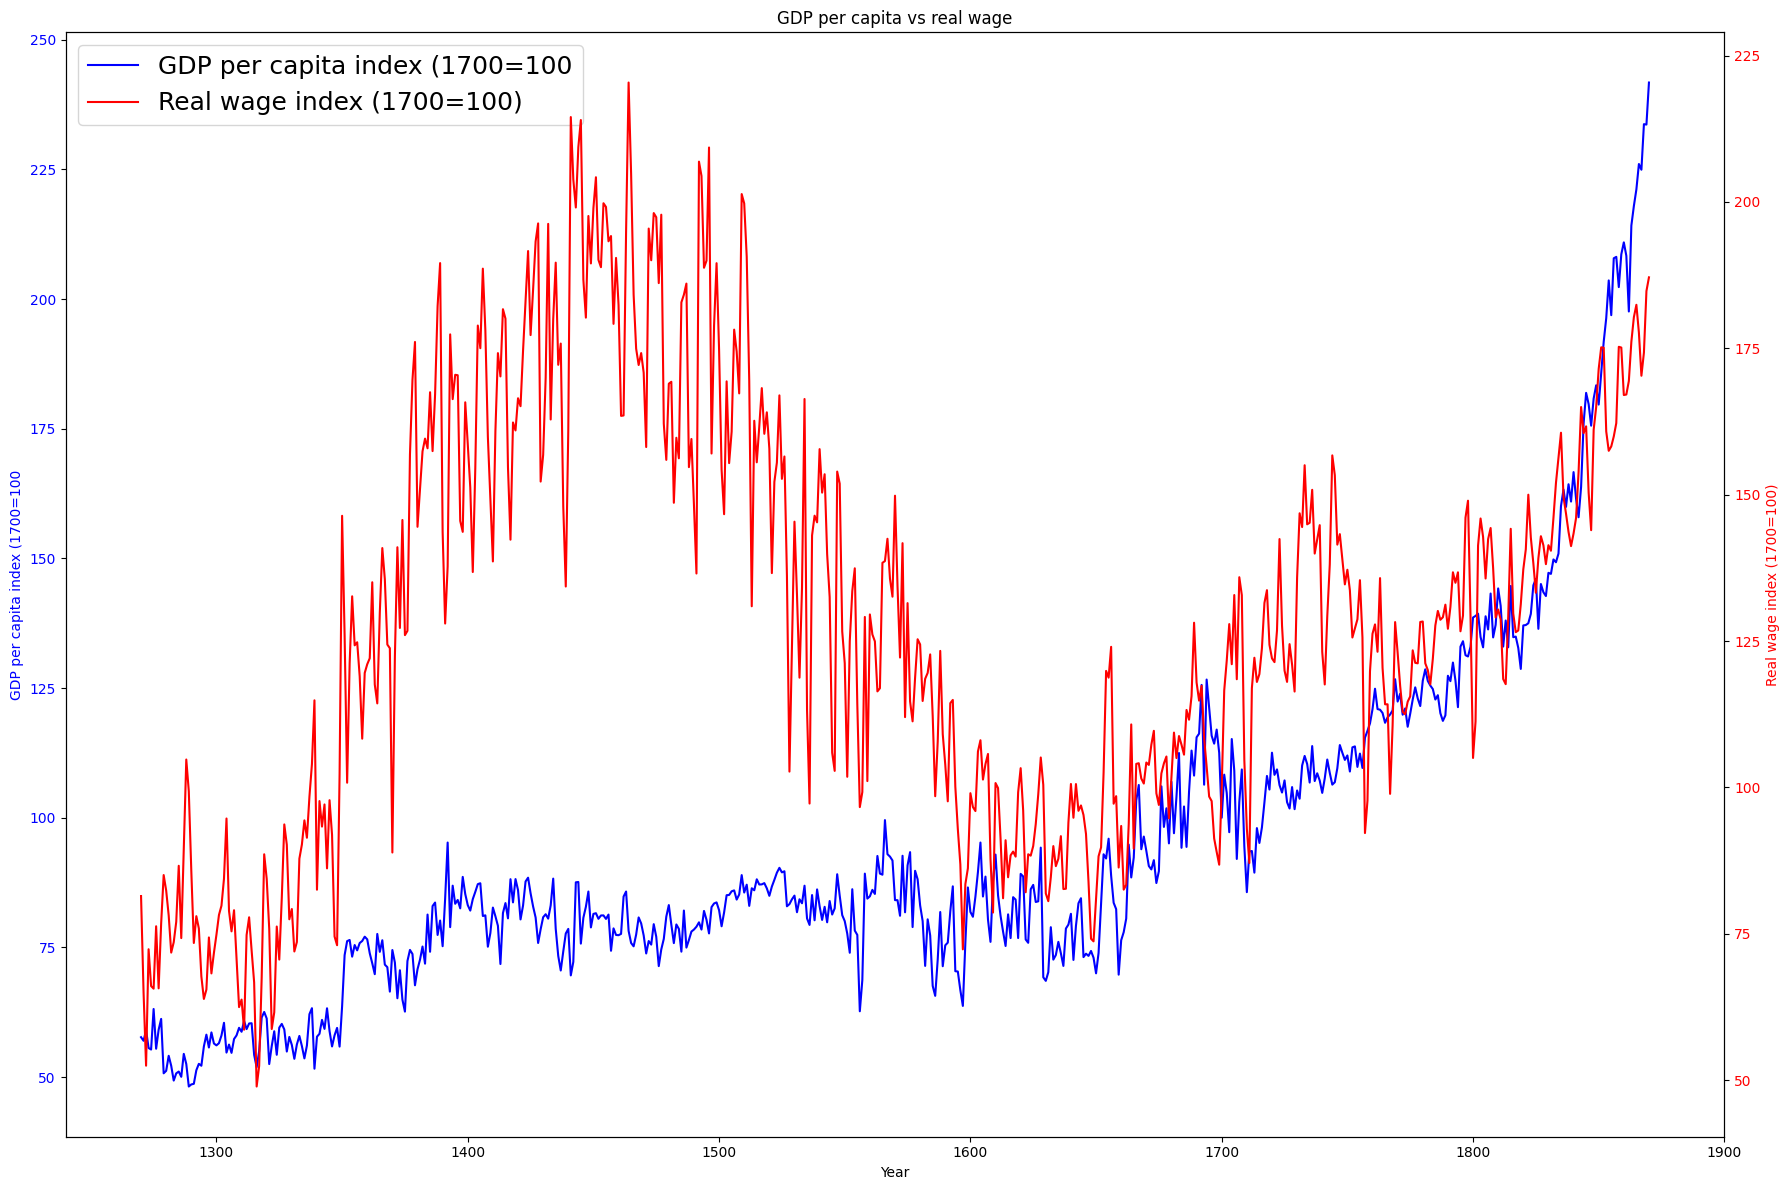

In [79]:
plot_dual_axis("Year", 
               "gdp_per_capita_index_1700_base", 
               "real_consumption_wage_index_1700_base", 
               "GDP per capita index (1700=100", 
               "Real wage index (1700=100)",
              "GDP per capita vs real wage")

## 5.4. Selected years comparison, bar chart:

In [81]:
years_to_compare = [1270, 1350, 1450, 1600, 1700, 1750, 1800, 1870]
df_bar_compare = df_uk_economics[df_uk_economics["Year"].isin(years_to_compare)]

# For grouped bar plot:
df_bar_plot = df_bar_compare.set_index("Year").T
df_bar_plot

Year,1270,1350,1450,1600,1700,1750,1800,1870
"Population, millions",4.364903,3.195428,1.904058,4.114891,6.205051,7.221009,10.614056,25.838
real_GDP_base_1700,40.581988,32.771351,24.996904,54.276106,100,130.345232,237.082587,1006.585918
real_consumption_wage_index_1700_base,81.453159,146.397646,198.958223,99.020733,100.0,137.184597,105.037719,187.124072
gdp_per_capita_index_1700_base,57.69047,63.63714,81.461306,81.845673,100.0,112.006345,138.600131,241.733774


In [82]:
new_indicator_names = [
    "Population (millions)",
    "Real GDP (1700=100)",
    "Real Consumption Wages (1700=100)",
    "GDP per Capita (1700=100)"
]

df_bar_plot.index = new_indicator_names
df_bar_plot

Year,1270,1350,1450,1600,1700,1750,1800,1870
Population (millions),4.364903,3.195428,1.904058,4.114891,6.205051,7.221009,10.614056,25.838
Real GDP (1700=100),40.581988,32.771351,24.996904,54.276106,100,130.345232,237.082587,1006.585918
Real Consumption Wages (1700=100),81.453159,146.397646,198.958223,99.020733,100.0,137.184597,105.037719,187.124072
GDP per Capita (1700=100),57.69047,63.63714,81.461306,81.845673,100.0,112.006345,138.600131,241.733774


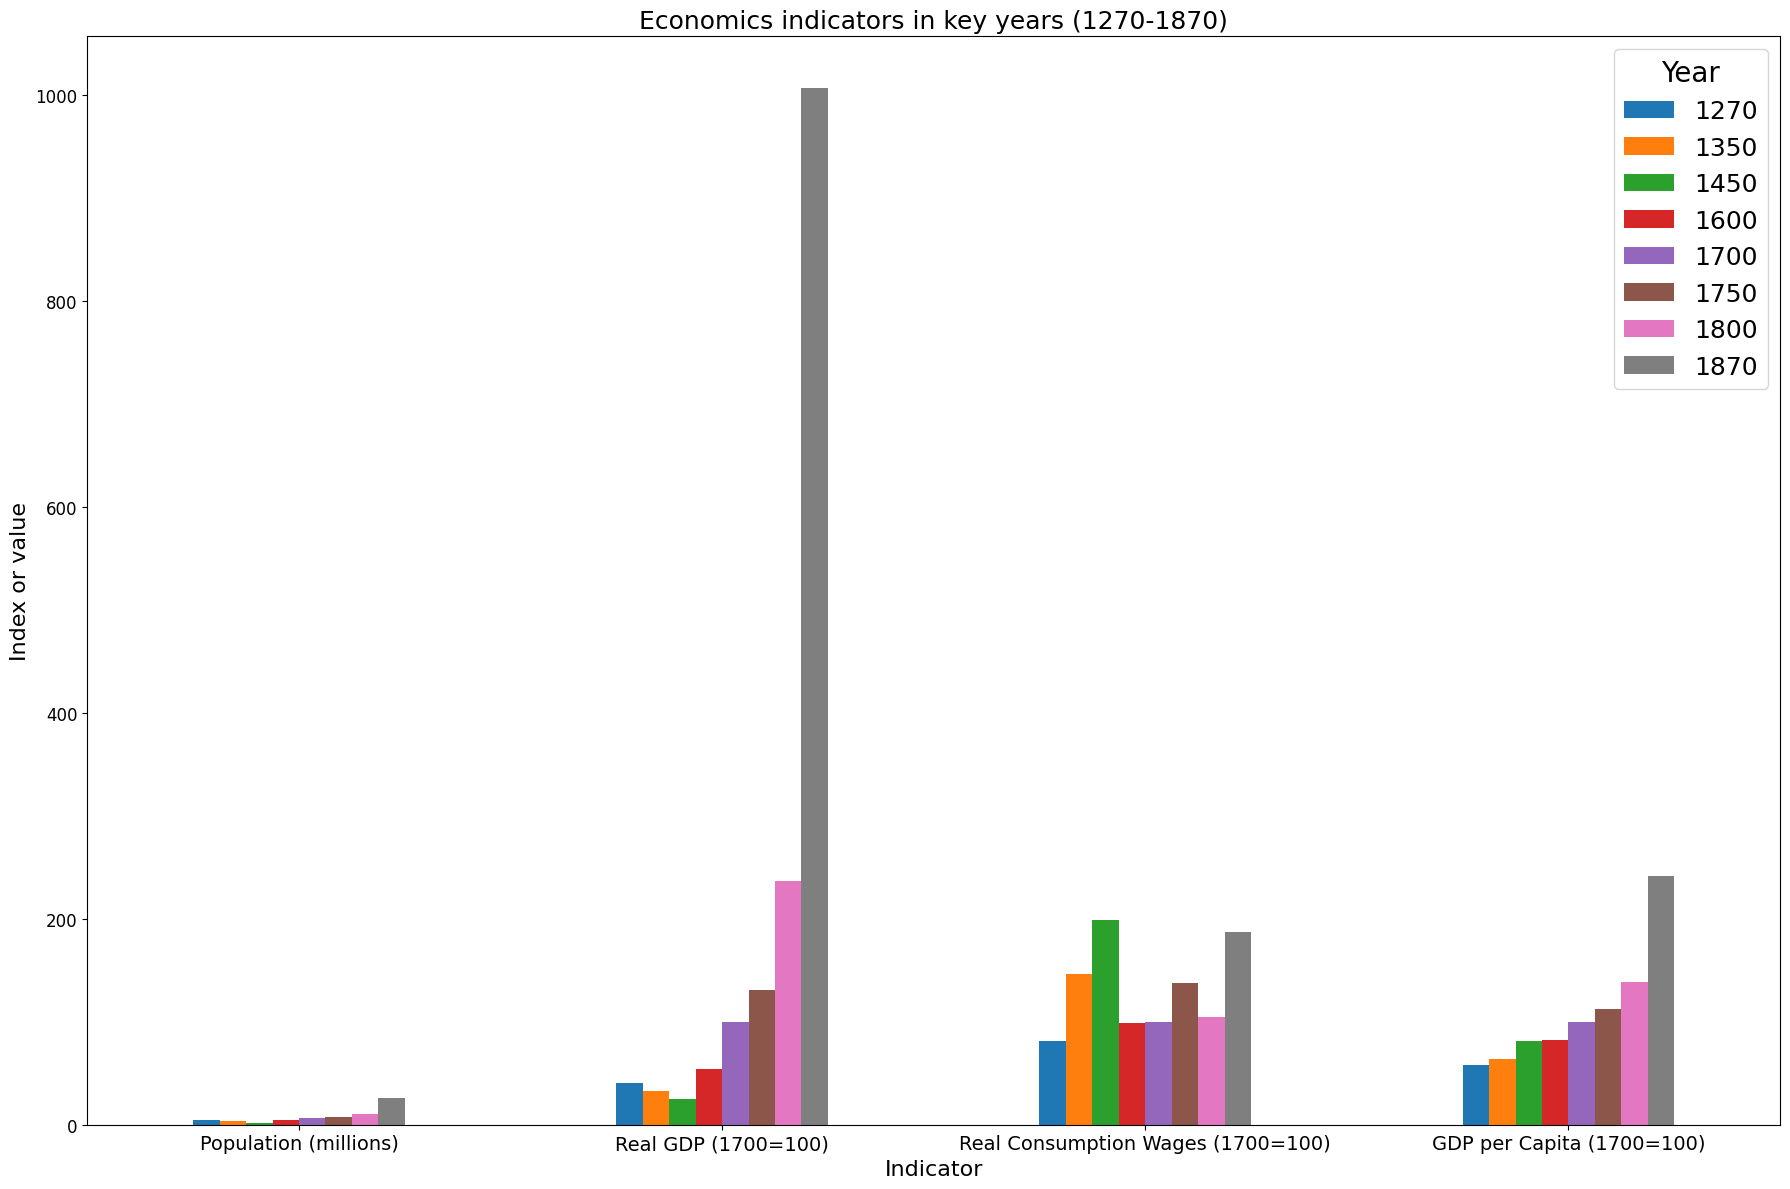

In [83]:
fig, ax = plt.subplots(figsize=(18,12))

df_bar_plot.plot(kind="bar", ax=ax, fontsize=14, rot=0)

ax.set_title("Economics indicators in key years (1270-1870)", fontsize=18)
ax.set_ylabel("Index or value", fontsize=16)
ax.set_xlabel("Indicator", fontsize=16)

ax.tick_params(axis='y', labelsize=12)

ax.legend(title="Year",loc='upper right', fontsize=18, title_fontsize=20)

fig.savefig("..\docs\docs\Economics_indicators_key_years_1270_1870", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

## 5.5. Observations and take-aways for the Powerpoint presentation:

**GDP grew exponentially after 1700**. **The founding of the Bank of England in 1694** and the **Union of England and Scotland in 1707** mark the institutional foundation of a modern economic system. These events likely contributed to:

- Increased state capacity.
- A more unified internal market.
- Greater public confidence in future opportunity.

All of which may help explain the **surge in population and economic activity after 1700**.

**Population and GDP tracked each other closely until 1750**, suggesting that early economic growth was extensive — fueled by more people, not more output per person.

**1750: beginning of the industrial revolution**. **After 1750, GDP per capita began to rise significantly**, indicating the onset of productivity-driven growth.

**Real consumption wages peaked around 1450**, at a time when the population had **not yet recovered from the Black Death a century earlier** (circa 1350). The sustained **labor shortage**, combined with the **redistribution of land and wealth from the deceased**, likely increased workers' bargaining power and access to resources. However, **as the population began to recover after 1450, the real wage gradually declined**, reflecting **renewed demographic pressure on wages** and a return to pre-industrial inequality. Real wages would not surpass their 15th-century levels until the late 19th century.

**By 1870, real wages had barely surpassed those of 1450**, despite GDP per capita rising more than twofold and total GDP increasing almost 25-fold. This highlights a **profound disconnect between national wealth and individual well-being**.

**GDP per capita and real wages diverged dramatically after 1750**, suggesting that economic gains were not equally shared. **The average worker did not benefit proportionally from national prosperity**.

**Population and real wages remained inversely correlated for much of the period**. When the population rises faster than productivity, wages fall.

The correlation matrix confirms **strong positive correlations between GDP, population, and GDP per capita** — but only a **weak correlation between real wages and any other variable**. This implies that economic **growth alone is not a reliable predictor of improved living standards**.

**Conclusion:**

The wage gains of 1450 were driven by demographic catastrophe, while those of 1870 emerged only after more than a century of industrialization. This reveals a **disturbing truth**: major improvements in individual well-being arose not from steady progress, but **from either mass mortality** or **long-delayed structural transformation** — often accompanied by the **exploitation of one’s fellow citizens**.